## Perturbed polynomials graphic

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import math

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import seaborn as sns
import matplotlib.ticker as ticker
matplotlib.rcParams['figure.dpi'] = 125 # figure resolution

Setting polynomial degree

In [4]:
coeff_1 = [1, -1] # (x-1), degree 1
coeff_2 = [1, -3, 2] # (x-1)(x-2), degree 2
coeff_3 = [1, -6, 11, -6] # (x-1)(x-2)(x-3), degree 3
coeff_4 = [1, -10, 35, -50, 24] # (x-1)(x-2)(x-3)(x-4), degree 4
coeff_5 = [1, -15, 85, -225, 274, -120] # (x-1)(x-2)(x-3)(x-4)(x-5), degree 5
coeff_6 = [1, -21, 175, -735, 1624, -1764, 720] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6), degree 6
coeff_7 = [1, -28, 322, -1960, 6769, -13132, 13068, -5040] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7), degree 7
coeff_8 = [1, -36, 546, -4536, 22449, -67284, 118124, -109584, 40320] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8), degree 8
coeff_9 = [1, -45, 870, -9450, 63273, -269325, 723680, -1172700, 1026576, -362880] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9), degree 9
coeff_10 = [1, -55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800] # (x-1)(x-2)(x-3)(x-4)(x-5)(x-6)(x-7)(x-8)(x-9)(x-10), degree 10

In [5]:
coeff = coeff_10 # polynomial degree
roots = np.roots(coeff)
print(roots)

[10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]


In [6]:
a_exp_multiple = list(np.arange(-10, 1.25, 0.25)) # consecutive numbers
a_vals_multiple = [0] + list(map(lambda x:pow(10, x), a_exp_multiple))
#a_vals_multiple = list(map(lambda x:pow(10, x), a_exp_multiple))

#print(a_exp_multiple)
#print(a_vals_multiple)

Perturbing coefficients

In [7]:
coeff_ck = coeff[1:]
print(coeff_ck)

[-55, 1320, -18150, 157773, -902055, 3416930, -8409500, 12753576, -10628640, 3628800]


In [8]:
def perturb_coeff(a, coeff):
    coeff_perturbed = []
    for c_k in coeff:
        e_k = np.random.normal(0, 1) # mu = 0, sigma = 1
        coeff_perturbed.append(c_k*(1 + a*e_k))
    return coeff_perturbed

def dist(coeff_ck, new_coeff_ck):
    return [i - j for i, j in zip(new_coeff_ck, coeff_ck)]

def roots_perturb_coeff(perturb_coeff):
    perturb_coeff_full = [1] + perturb_coeff
    return np.roots(perturb_coeff_full)

def real_roots(roots):
    return list(roots.real[abs(roots.imag)<1e-5])

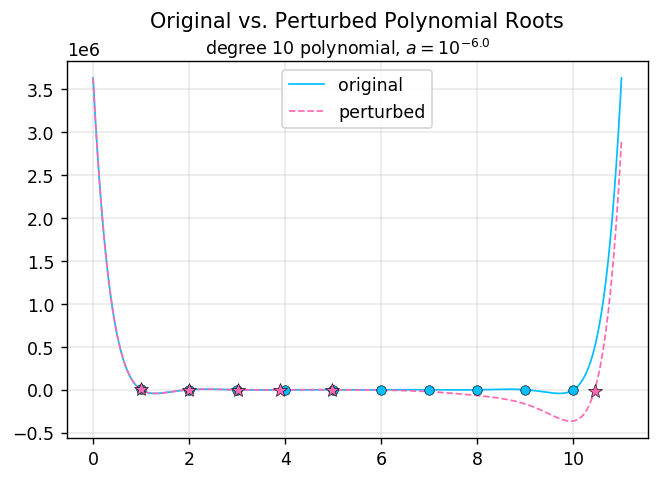

In [9]:
# original vs. perturbed polynomial

coeff_reversed = coeff[::-1]
a_exp = -6.0
a = 10**a_exp
perturb_coeff_reversed = perturb_coeff(a, coeff)[::-1] 

x = np.linspace(0, 11, num=1000)
y = np.array([np.sum(np.array([coeff_reversed[i]*(j**i) for i in range(len(coeff_reversed))])) for j in x])
y_perturb = np.array([np.sum(np.array([perturb_coeff_reversed[i]*(j**i) for i in range(len(perturb_coeff_reversed))])) for j in x])

# plotting polynomials
plt.plot(x, y, linewidth=1, color = 'deepskyblue', label='original')
plt.plot(x, y_perturb, linewidth=1, linestyle='--', color='hotpink', label='perturbed')
plt.legend(loc='best')

# plotting roots
x_axis = np.linspace(0, 0, num=1000)
idx = np.argwhere(np.diff(np.sign(y - x_axis))).flatten()
idx_perturb = np.argwhere(np.diff(np.sign(y_perturb - x_axis))).flatten()
plt.plot(x[idx], y[idx], 'o', color='deepskyblue', ms=5.5, markeredgecolor='black', markeredgewidth=0.35)
plt.plot(x[idx_perturb], y_perturb[idx_perturb], '*', color='hotpink', ms=8, markeredgecolor='black', markeredgewidth=0.35)

plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.title('Original vs. Perturbed Polynomial Roots', y=1.06)
plt.suptitle('degree {} polynomial, $a = 10^{}$'.format(len(coeff)-1, {a_exp}), fontsize=10, y=0.93)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()

## Critical $a$ probability
Multiple runs for multiple $a$ values

In [10]:
def get_probs(a_list, num_runs):
    a_prob_dict = {}
    for a in a_list:
        a_exp = np.log10(a)
        imag_presence_count = 0
        for num in range(num_runs):
            coeff = perturb_coeff(a, coeff_ck)
            roots = roots_perturb_coeff(coeff) # all roots
            real_roots_poly = real_roots(roots)
            if len(real_roots_poly) < len(coeff): # indicates presence of at least one imaginary root
                imag_presence_count += 1
        a_prob = imag_presence_count/num_runs # probability
        a_prob_dict[a] = [a, a_exp, a_prob]
    a_prob_df = pd.DataFrame.from_dict(a_prob_dict, orient='index', 
                                       columns=['a', 'a_exp', 'probability']).reset_index(drop=True)
    return a_prob_df

In [11]:
num_runs = 100 #1000
a_prob_df = get_probs(a_vals_multiple, num_runs)
a_prob_df.head()

,a,a_exp,probability
0,0.000000e+00,-inf,0.0
1,1.000000e-10,-10.00,0.0
2,1.778279e-10,-9.75,0.0
3,3.162278e-10,-9.50,0.0
4,5.623413e-10,-9.25,0.0


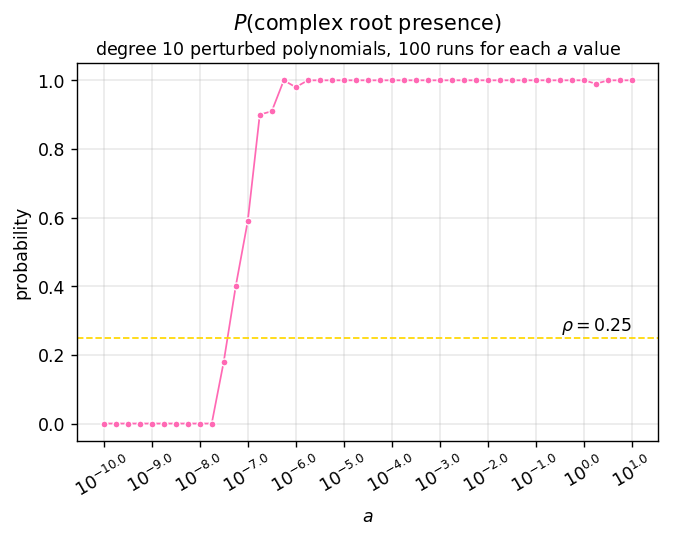

In [12]:
# probability plot
lineplot = sns.lineplot(x='a_exp', y='probability', data=a_prob_df, marker='o', ms=4, color='hotpink', linewidth=1)

lineplot.xaxis.set_major_locator(ticker.MultipleLocator(1))
lineplot.xaxis.set_major_formatter(ticker.ScalarFormatter())
lineplot.set_xticklabels(['$10^{}$'.format({float(label)}) for label in lineplot.get_xticks()], rotation=30, horizontalalignment='center')
lineplot.set(xlabel='$a$')
lineplot.set(ylabel='probability')
plt.title('$P$(complex root presence)', y=1.06)
plt.suptitle('degree {} perturbed polynomials, {} runs for each $a$ value'.format(len(coeff_ck), num_runs), fontsize=10, y=0.93)

plt.text(1, 0.27,'$ρ = 0.25$',horizontalalignment='right')
plt.axhline(y=0.25, color='gold', linestyle='--', linewidth=1) # p_0 value (arbitrary)
plt.grid(linestyle='-', linewidth=0.25)
plt.show()